In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import lis

In [3]:
coordinates = pd.read_csv('../data/coordinates.csv', ';', header=None, decimal=',')
connections = pd.read_csv('../data/connect.csv', ';', header=None)
chip_1 = coordinates[:40].set_index([0]).drop([1], axis=1)
chip_2 = coordinates[40:].set_index([0]).drop([1], axis=1)

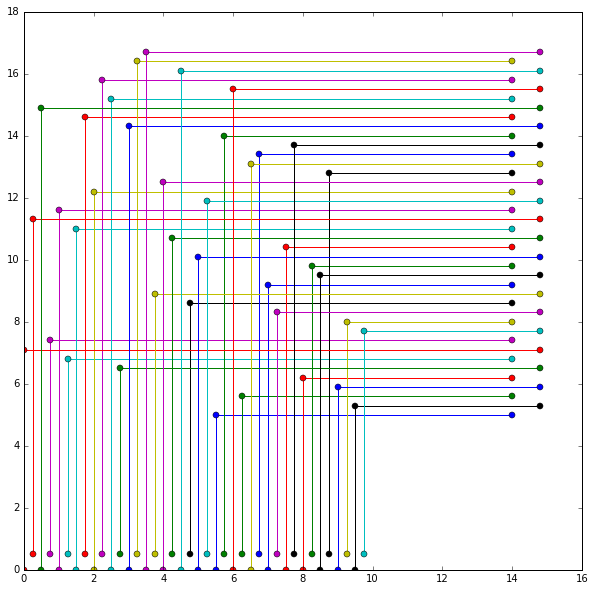

In [4]:
plt.figure(figsize=[10, 10])
#plt.scatter(coordinates[2].values, coordinates[3].values)
for connect in connections.values:
    if chip_2.values[connect[1]-1][0] < 14.5:
        plt.plot([chip_1.values[connect[0]-1][0], 
                  chip_1.values[connect[0]-1][0], 
                  chip_2.values[connect[1]-1][0]], 
                 [chip_1.values[connect[0]-1][1], 
                  chip_2.values[connect[1]-1][1], 
                  chip_2.values[connect[1]-1][1]], '-o')
    if chip_2.values[connect[1]-1][0] > 14.5:
        plt.plot([chip_1.values[connect[0]-1][0], 
                  chip_1.values[connect[0]-1][0], 
                  chip_2.values[connect[1]-1][0]], 
                 [chip_1.values[connect[0]-1][1], 
                  chip_2.values[connect[1]-1][1]+0.3,
                  chip_2.values[connect[1]-1][1]+0.3], '-o')

In [5]:
new_points = []
for connect in connections.values:
    if chip_2.values[connect[1]-1][0] < 14.5:
        new_points.append((chip_1.values[connect[0]-1][0], chip_2.values[connect[1]-1][1]))
    if chip_2.values[connect[1]-1][0] > 14.5:
        new_points.append((chip_1.values[connect[0]-1][0], chip_2.values[connect[1]-1][1]+0.3))

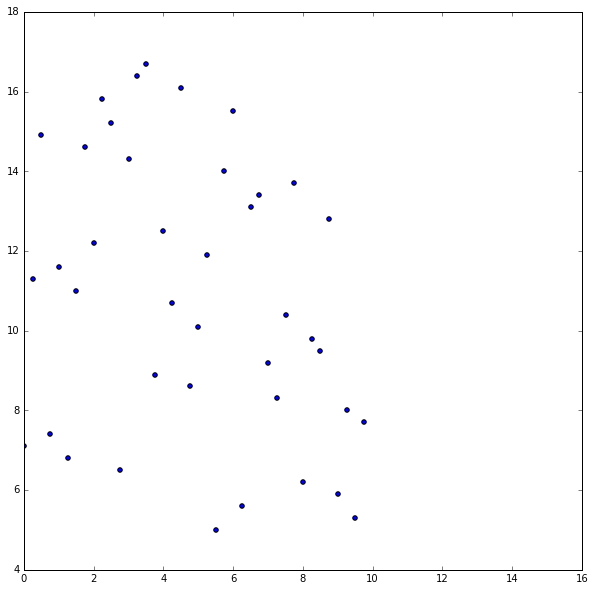

In [6]:
plt.figure(figsize=[10, 10])
plt.xlim(0, 16)
plt.scatter(np.array(new_points).T[0], np.array(new_points).T[1])

In [7]:
min_distance = 0.0
for i in connections.values:
    min_distance += np.sqrt(np.sum((chip_1.values[i[0]-1]-chip_2.values[i[1]-1])**2))
min_distance

575.51884887481231

In [8]:
new_points.sort()
new_points.reverse()

In [9]:
residuals = new_points
subsequences = []
while len(residuals) > 2:
    sequence = list(zip(*residuals)[1])
    longest_subseq = lis.longest_increasing_subsequence(sequence)
    subsequences.append(longest_subseq)
    idxs = list(set(range(len(residuals))) - set(longest_subseq[0]))
    idxs.sort()
    residuals = np.array(new_points)[idxs].tolist()

In [10]:
subsequences

[([2, 4, 8, 11, 12, 20, 23, 24, 28, 33, 38],
  [5.2999999999999998,
   5.8999999999999995,
   6.2000000000000002,
   8.3000000000000007,
   9.1999999999999993,
   10.100000000000001,
   10.700000000000001,
   12.5,
   14.300000000000001,
   14.6,
   14.9]),
 ([2, 3, 4, 5, 7, 9, 12, 20, 24, 28],
  [5.3,
   5.8999999999999995,
   9.5,
   9.8,
   10.4,
   13.100000000000001,
   14.0,
   14.3,
   14.6,
   14.9]),
 ([2, 5, 6, 13, 15, 16, 19],
  [5.3, 8.3, 9.2, 10.100000000000001, 10.700000000000001, 12.5, 14.3]),
 ([2, 3, 5, 8, 9, 13], [5.3, 5.8999999999999995, 6.2, 8.3, 9.2, 11.9]),
 ([2, 5, 6, 7, 8], [5.3, 6.2, 8.3, 9.2, 13.4]),
 ([2, 3, 4], [5.3, 5.8999999999999995, 12.8])]